In [41]:
import sys
import pickle
sys.path.append('.')

from testing_normal_functions import spectral_emb, clt_sample, plot_spherical_data,\
                                    mvn_assump_samples_wrapper, samples_under_assump
import numpy as np
from scipy.stats import beta, wasserstein_distance
import matplotlib.pyplot as plt
from copy import deepcopy


np.random.seed(45)

μ_1 = np.array([0.25,0.75])
μ_2 = np.array([0.75, 0.25])

N_t=1000

<h2> Test with Beta(2,2) prior </h2>

In [42]:
α, β = 2, 2
prior = lambda : beta.rvs(α, β)
exp_rho = α / (α + β)
second_mom_rho = beta.moment(2, α, β)

<h3> Spectral Embedding </h3>

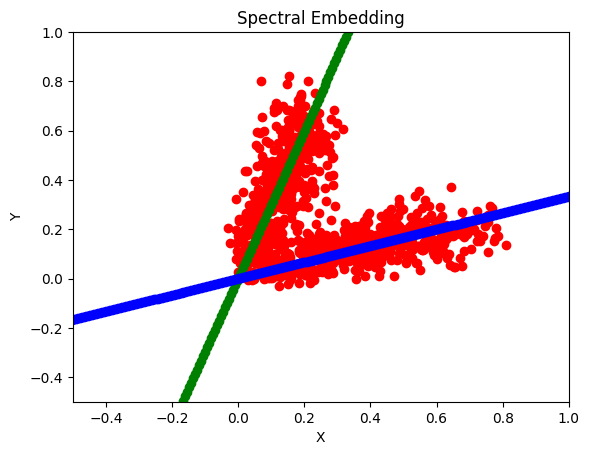

In [43]:
spectral_embedding = spectral_emb(μ_1, μ_2, prior, N_t=1000)

plot_spherical_data(zip([spectral_embedding[:,0]], [spectral_embedding[:,1]]),
                  μ_1, μ_2, "Spectral Embedding")


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 122985.69it/s]


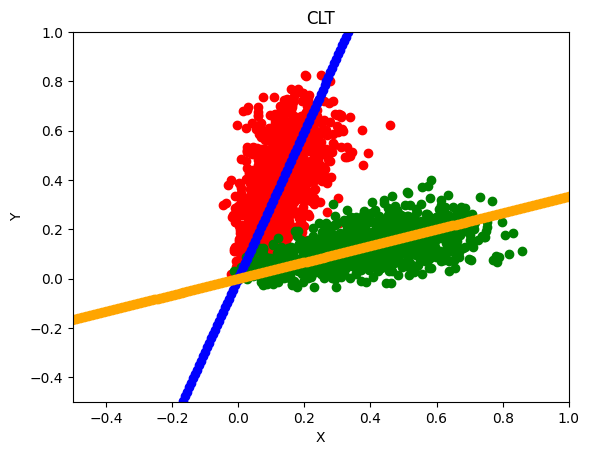

In [44]:
samples_from_clt = clt_sample(prior, μ_1, μ_2, exp_rho)

clt_zip_samples = [
                (samples_from_clt[:N_t,0], samples_from_clt[:N_t,1]),
               (samples_from_clt[N_t:,0], samples_from_clt[N_t:,1])
               ]


plot_spherical_data(clt_zip_samples, μ_1, μ_2, "CLT")


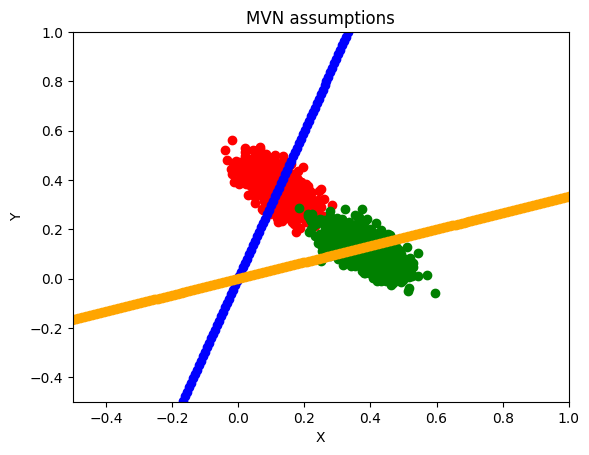

In [45]:
mvn1_x, mvn1_y, mvn2_x, mvn2_y = mvn_assump_samples_wrapper(μ_1, μ_2, prior, exp_rho, second_mom_rho)

mvn_zip_samples = [
                (mvn1_x, mvn1_y),
               (mvn2_x, mvn2_y)
               ]


plot_spherical_data(mvn_zip_samples, μ_1, μ_2, "MVN assumptions")

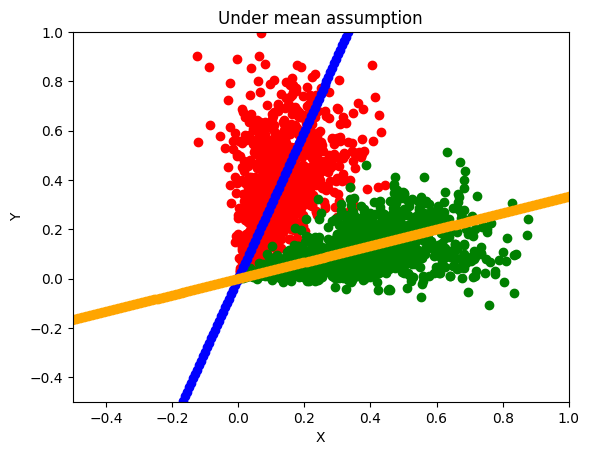

In [46]:
under_assump = samples_under_assump(μ_1, μ_2, prior, exp_rho)

zipped_under_assump = [
    (under_assump[:N_t,0], under_assump[:N_t,1]),
    (under_assump[N_t:,0], under_assump[N_t:,1])
]

plot_spherical_data(zipped_under_assump, μ_1, μ_2, "Under mean assumption")

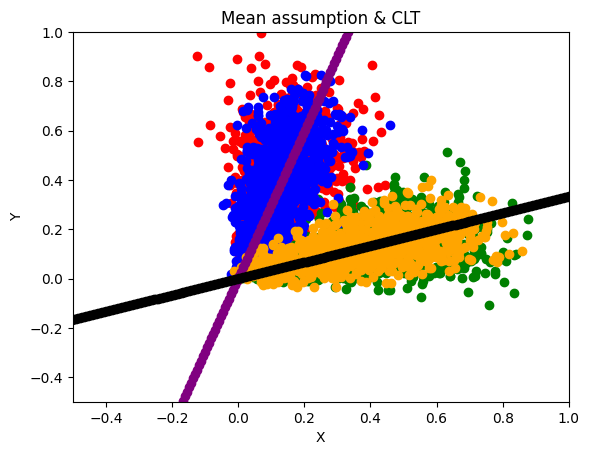

In [47]:
zua = deepcopy(zipped_under_assump)
zua.extend(clt_zip_samples)

plot_spherical_data(zua, μ_1, μ_2, "Mean assumption & CLT")

<h4> Calculate spherical transformation </h4>

In [48]:
sph_trans_clt_group_1 = np.arctan2(samples_from_clt[:N_t,1], samples_from_clt[:N_t,0])
sph_trans_clt_group_2 = np.arctan2(samples_from_clt[N_t:,1], samples_from_clt[N_t:,0])

sph_trans_mvn_group_1 = np.arctan2(mvn1_y, mvn1_x)
sph_trans_mvn_group_2 = np.arctan2(mvn2_y, mvn2_x)

wass_dist_group_1 = wasserstein_distance(sph_trans_clt_group_1, sph_trans_mvn_group_1)
wass_dist_group_2 = wasserstein_distance(sph_trans_clt_group_2, sph_trans_mvn_group_2)

print(wass_dist_group_1, wass_dist_group_2)

0.018649802294682286 0.024014603100942812


<h3> Store Data in Pickle File </h3>

In [49]:
# Store data in pickle file
with open('beta_2_2_approximations.pkl', 'wb') as file:  # 'wb' for write binary
    pickle.dump(spectral_embedding, file)
    pickle.dump(samples_from_clt, file)
    pickle.dump((mvn1_x, mvn1_y, mvn2_x, mvn2_y), file)
    pickle.dump(under_assump, file)
    pickle.dump(wass_dist_group_1, file)
    pickle.dump(wass_dist_group_2, file)

<h2> Beta(4,2) Distribution</h2>

This beta distribution is skewed more towards (0,1) - where the assumptions are more accurate

In [50]:
α, β = 4, 2
prior = lambda : beta.rvs(α, β)
exp_rho = α / (α + β)
second_mom_rho = beta.moment(2, α, β)

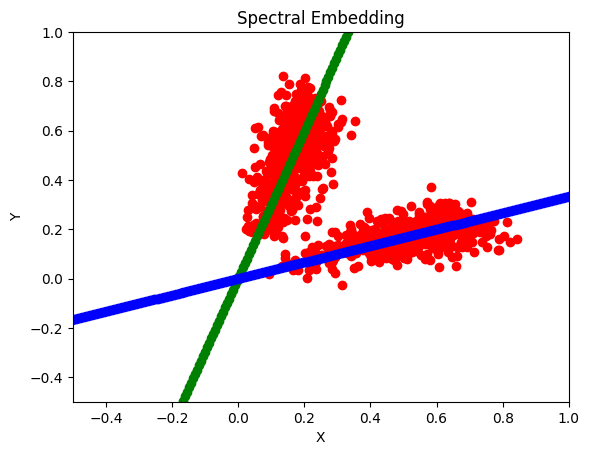

In [51]:
spectral_embedding = spectral_emb(μ_1, μ_2, prior, N_t=1000)

plot_spherical_data(zip([spectral_embedding[:,0]], [spectral_embedding[:,1]]),
                  μ_1, μ_2, "Spectral Embedding")

100%|██████████| 1000/1000 [00:00<00:00, 134338.09it/s]


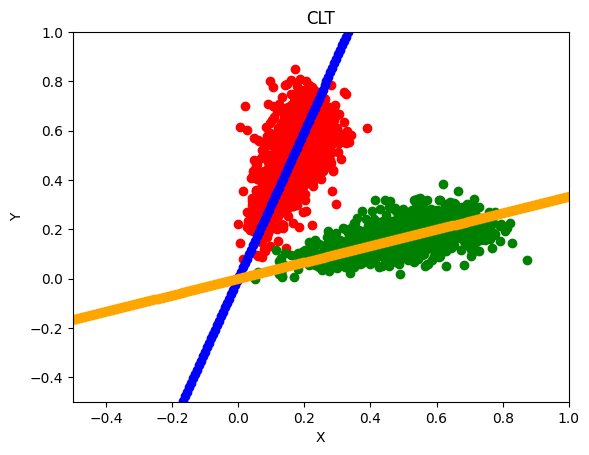

In [52]:
samples_from_clt = clt_sample(prior, μ_1, μ_2, exp_rho)

clt_zip_samples = [
                (samples_from_clt[:N_t,0], samples_from_clt[:N_t,1]),
               (samples_from_clt[N_t:,0], samples_from_clt[N_t:,1])
               ]


plot_spherical_data(clt_zip_samples, μ_1, μ_2, "CLT")

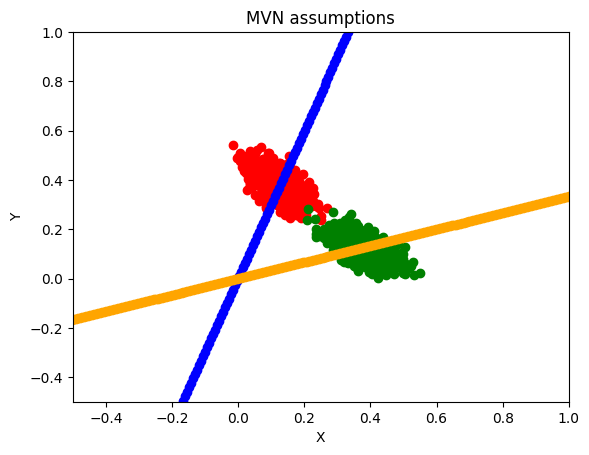

In [53]:
mvn1_x, mvn1_y, mvn2_x, mvn2_y = mvn_assump_samples_wrapper(μ_1, μ_2, prior, exp_rho, second_mom_rho)

mvn_zip_samples = [
                (mvn1_x, mvn1_y),
               (mvn2_x, mvn2_y)
               ]


plot_spherical_data(mvn_zip_samples, μ_1, μ_2, "MVN assumptions")

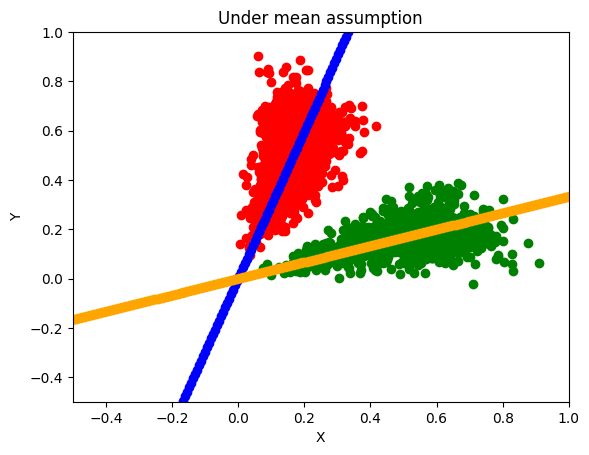

In [54]:
under_assump = samples_under_assump(μ_1, μ_2, prior, exp_rho)

zipped_under_assump = [
    (under_assump[:N_t,0], under_assump[:N_t,1]),
    (under_assump[N_t:,0], under_assump[N_t:,1])
]

plot_spherical_data(zipped_under_assump, μ_1, μ_2, "Under mean assumption")

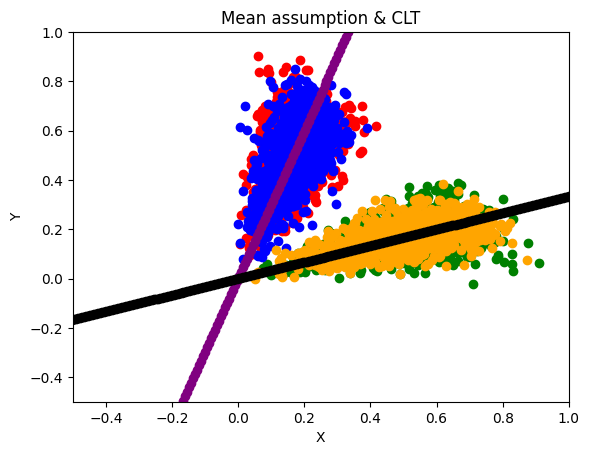

In [55]:
zua = deepcopy(zipped_under_assump)
zua.extend(clt_zip_samples)

plot_spherical_data(zua, μ_1, μ_2, "Mean assumption & CLT")

<h4> Spherical Transformation </h4>

In [56]:
sph_trans_clt_group_1 = np.arctan2(samples_from_clt[:N_t,1], samples_from_clt[:N_t,0])
sph_trans_clt_group_2 = np.arctan2(samples_from_clt[N_t:,1], samples_from_clt[N_t:,0])

sph_trans_mvn_group_1 = np.arctan2(mvn1_y, mvn1_x)
sph_trans_mvn_group_2 = np.arctan2(mvn2_y, mvn2_x)

wass_dist_group_1 = wasserstein_distance(sph_trans_clt_group_1, sph_trans_mvn_group_1)
wass_dist_group_2 = wasserstein_distance(sph_trans_clt_group_2, sph_trans_mvn_group_2)

print(wass_dist_group_1, wass_dist_group_2)

0.021818157850424853 0.024105216628180236


In [57]:
with open('beta_4_2_approximations.pkl', 'wb') as file:  # 'wb' for write binary
    pickle.dump(spectral_embedding, file)
    pickle.dump(samples_from_clt, file)
    pickle.dump((mvn1_x, mvn1_y, mvn2_x, mvn2_y), file)
    pickle.dump(under_assump, file)
    pickle.dump(wass_dist_group_1, file)
    pickle.dump(wass_dist_group_2, file)